# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import time
import urllib
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
output_data = "output/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL

api_key = "fac72e9f2e807dfd3f10bb89a793d411"

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    # Log the url, record and set numbers 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass 
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=port-aux-francais
Processing Record 2 of Set 1 | at-bashi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=at-bashi
Processing Record 3 of Set 1 | grytviken
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=grytviken
Processing Record 4 of Set 1 | udachny
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=udachny
Processing Record 5 of Set 1 | waitangi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=waitangi
Processing Record 6 of Set 1 | queenstown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=queenstown
Proces

Processing Record 4 of Set 2 | puerto santa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=puerto%20santa
Processing Record 5 of Set 2 | vorgashor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=vorgashor
Processing Record 6 of Set 2 | kocahasanli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=kocahasanli
City not found. Skipping...
Processing Record 7 of Set 2 | guapimirim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=guapimirim
Processing Record 8 of Set 2 | parras de la fuente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=parras%20de%20la%20fuente
Processing Record 9 of Set 2 | dapchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=dapchi
Processing Rec

Processing Record 8 of Set 3 | metlili chaamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=metlili%20chaamba
Processing Record 9 of Set 3 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=bredasdorp
Processing Record 10 of Set 3 | riosucio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=riosucio
Processing Record 11 of Set 3 | ilhabela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=ilhabela
Processing Record 12 of Set 3 | cable beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=cable%20beach
City not found. Skipping...
Processing Record 13 of Set 3 | petropavlovsk-kamchatsky
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=petropavlovsk-kamchat

Processing Record 12 of Set 4 | hadibu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=hadibu
Processing Record 13 of Set 4 | eirunepe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=eirunepe
Processing Record 14 of Set 4 | north bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=north%20bend
Processing Record 15 of Set 4 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=alofi
Processing Record 16 of Set 4 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=severo-yeniseyskiy
Processing Record 17 of Set 4 | kegen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=kegen
Processing Record 18 of Set 4 | bako
http://api.openweathermap.org/data/

Processing Record 16 of Set 5 | raduzhny
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=raduzhny
Processing Record 17 of Set 5 | fale old settlement
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=fale%20old%20settlement
Processing Record 18 of Set 5 | nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=nemuro
Processing Record 19 of Set 5 | tobelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=tobelo
Processing Record 20 of Set 5 | qiqihar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=qiqihar
Processing Record 21 of Set 5 | ghat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=ghat
Processing Record 22 of Set 5 | patterson
http://api.openweathermap.org/da

Processing Record 20 of Set 6 | kapuskasing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=kapuskasing
Processing Record 21 of Set 6 | marsh harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=marsh%20harbour
Processing Record 22 of Set 6 | guanica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=guanica
Processing Record 23 of Set 6 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=alice%20springs
Processing Record 24 of Set 6 | utrik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=utrik
Processing Record 25 of Set 6 | khagrachhari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=khagrachhari
Processing Record 26 of Set 6 | 'ohonua
http://api.o

Processing Record 23 of Set 7 | urucara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=urucara
Processing Record 24 of Set 7 | diego de almagro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=diego%20de%20almagro
Processing Record 25 of Set 7 | chonchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=chonchi
Processing Record 26 of Set 7 | egilsstadir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=egilsstadir
Processing Record 27 of Set 7 | kirensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=kirensk
Processing Record 28 of Set 7 | siracusa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=siracusa
Processing Record 29 of Set 7 | tsiolkovskiy
http://api.openwe

Processing Record 28 of Set 8 | toga village
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=toga%20village
City not found. Skipping...
Processing Record 29 of Set 8 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=margate
Processing Record 30 of Set 8 | kharp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=kharp
Processing Record 31 of Set 8 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=ancud
Processing Record 32 of Set 8 | machico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=machico
Processing Record 33 of Set 8 | zomba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=zomba
Processing Record 34 of Set 8 | colon
http://api.openweathermap.or

Processing Record 32 of Set 9 | ntungamo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=ntungamo
Processing Record 33 of Set 9 | champerico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=champerico
Processing Record 34 of Set 9 | neiafu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=neiafu
Processing Record 35 of Set 9 | kasempa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=kasempa
Processing Record 36 of Set 9 | wynyard
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=wynyard
Processing Record 37 of Set 9 | alaghsas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=alaghsas
Processing Record 38 of Set 9 | fortuna
http://api.openweathermap.org/data/2.5/weather

Processing Record 35 of Set 10 | durres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=durres
Processing Record 36 of Set 10 | campo formoso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=campo%20formoso
Processing Record 37 of Set 10 | cooper's town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=cooper%27s%20town
Processing Record 38 of Set 10 | altai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=altai
Processing Record 39 of Set 10 | arizona city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=arizona%20city
Processing Record 40 of Set 10 | shahrud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=shahrud
Processing Record 41 of Set 10 | dampit
http://api.o

Processing Record 38 of Set 11 | washington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=washington
Processing Record 39 of Set 11 | polyarnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=polyarnyy
Processing Record 40 of Set 11 | nar'yan-mar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=nar%27yan-mar
Processing Record 41 of Set 11 | sam roi yot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=sam%20roi%20yot
Processing Record 42 of Set 11 | nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=nabire
Processing Record 43 of Set 11 | hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=hovd
Processing Record 44 of Set 11 | nelson bay
http://api.openweath

Processing Record 41 of Set 12 | kristiansund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=kristiansund
Processing Record 42 of Set 12 | polyarnyye zori
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=polyarnyye%20zori
Processing Record 43 of Set 12 | puerto baquerizo moreno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=puerto%20baquerizo%20moreno
Processing Record 44 of Set 12 | muntok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=muntok
Processing Record 45 of Set 12 | al ghayzah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=al%20ghayzah
Processing Record 46 of Set 12 | acapulco de juarez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fac72e9f2e807dfd3f10bb89a793d411&q=acapulco%20de%2

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [7]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,46.17,98,100,29.42,TF,1684881851
1,at-bashi,41.1702,75.8106,48.02,89,94,1.39,KG,1684881851
2,grytviken,-54.2811,-36.5092,35.42,82,31,10.67,GS,1684881852
3,udachny,66.4167,112.4000,35.46,80,59,12.37,RU,1684881852
4,waitangi,-43.9535,-176.5597,55.81,95,2,4.00,NZ,1684881852


In [8]:
# Extract relevant information from the DataFrame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv(output_data, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,46.17,98,100,29.42,TF,1684881851
1,at-bashi,41.1702,75.8106,48.02,89,94,1.39,KG,1684881851
2,grytviken,-54.2811,-36.5092,35.42,82,31,10.67,GS,1684881852
3,udachny,66.4167,112.4000,35.46,80,59,12.37,RU,1684881852
4,waitangi,-43.9535,-176.5597,55.81,95,2,4.00,NZ,1684881852


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

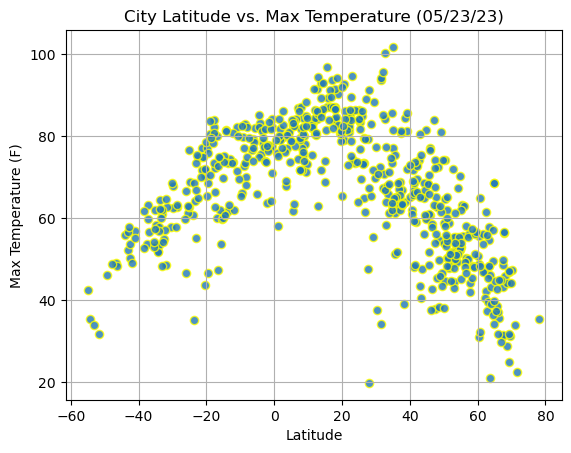

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps,
           edgecolor="yellow", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

**Discussion about the linear relationship:** Humdity and temperature appear to be clustred together. Temperature appears to increase as we move closer to Prime Meridian. 

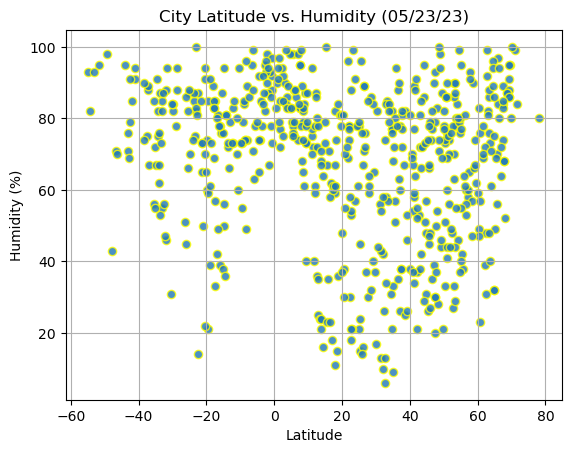

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity,
           edgecolor="yellow", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The scatter plot does not indicate the correlation between latitude and humidity.

#### Latitude Vs. Cloudiness

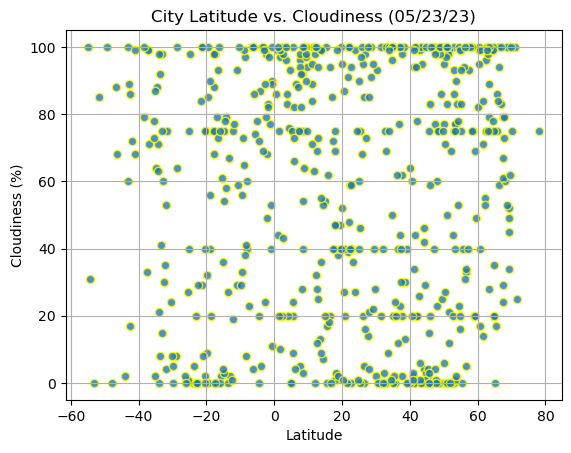

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness,
           edgecolor="yellow", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The scatter plot does not indicate any correlation between latitude and cloudiness. 

#### Latitude vs. Wind Speed Plot

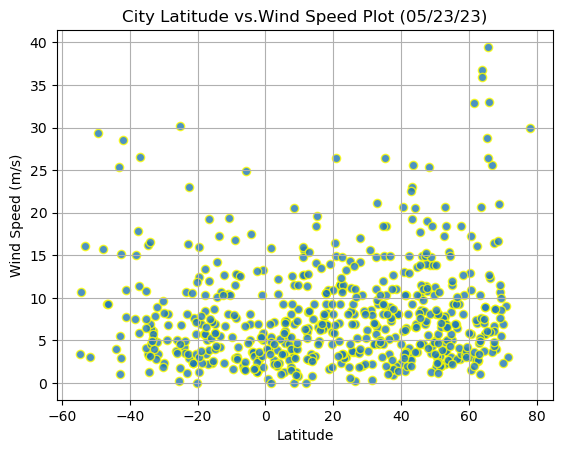

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed,
           edgecolor="yellow", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs.Wind Speed Plot ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Wind speed remains fairly constant despite change in latitude. 

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x, y):
    slope, inter, r, p, std_err = linregress(x, y)
    fit = slope * x + inter
    line = "y = " + str(round(slope,2)) + "x + " + str(round(inter))
    plt.scatter(x,y)
    plt.plot(x,fit,"r-")
    plt.annotate(line, (5, 0), fontsize=12,color="green")
    plt.annotate(line, (-20, 5), fontsize=12,color="green")
    print(f"The r-value is: {r}")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df = northern_hemi_df.reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,at-bashi,41.1702,75.8106,48.02,89,94,1.39,KG,1684881851
1,udachny,66.4167,112.4000,35.46,80,59,12.37,RU,1684881852
2,whitehorse,60.7161,-135.0538,64.81,23,40,5.75,CA,1684881722
3,verkhnedneprovskiy,54.9813,33.3457,52.95,95,99,5.01,RU,1684881852
4,puerto real,36.5282,-6.1901,62.76,88,40,3.44,ES,1684881852


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
southern_hemi_df = southern_hemi_df.reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,46.17,98,100,29.42,TF,1684881851
1,grytviken,-54.2811,-36.5092,35.42,82,31,10.67,GS,1684881852
2,waitangi,-43.9535,-176.5597,55.81,95,2,4.00,NZ,1684881852
3,queenstown,-31.8976,26.8753,48.47,46,4,4.76,ZA,1684881633
4,richards bay,-28.7830,32.0377,62.62,88,64,6.78,ZA,1684881852


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7761793471934858


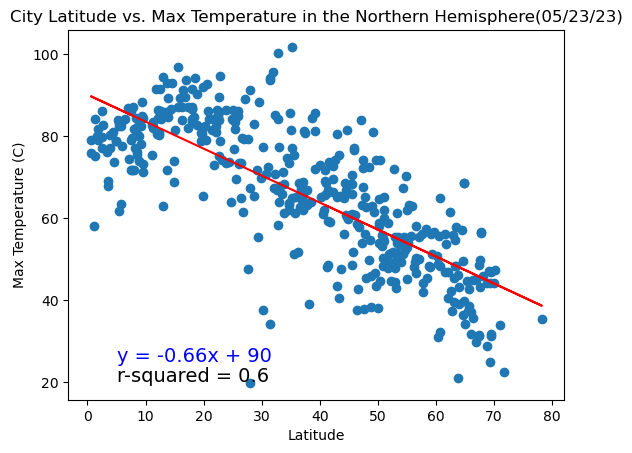

In [63]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

lin_reg_plot(x,y)
slope, inter, r, p, std_err = linregress(x, y)
r_squared = round(r**2,2)
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter))
plt.annotate(f"r-squared = {r_squared}", (5,20), fontsize=14, color="black")
plt.annotate(line,(5,25), fontsize=14, color="blue")
plt.title(f"City Latitude vs. Max Temperature in the Northern Hemisphere({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.show()

**Discussion about the linear relationship:** Temperature and latitude are inversely proportional on the Northern hemisphere. The r-squared value is 0.6 which is close to 1. 

The r-value is: 0.769990735363114


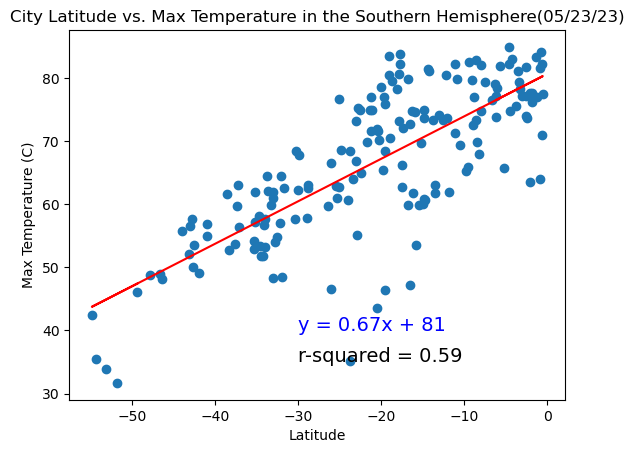

In [64]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

lin_reg_plot(x,y)
slope, inter, r, p, std_err = linregress(x, y)
r_squared = round(r**2,2)
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter))
plt.annotate(f"r-squared = {r_squared}", (-30,35), fontsize=14, color="black")
plt.annotate(line,(-30,40), fontsize=14, color="blue")
plt.title(f"City Latitude vs. Max Temperature in the Southern Hemisphere({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.show()

**Discussion about the linear relationship:** Temperature and latitude are directly proportional in the Southern hemisphere. The r-squared value is 0.59, which is closer to 1 than zero. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.024192834914620712


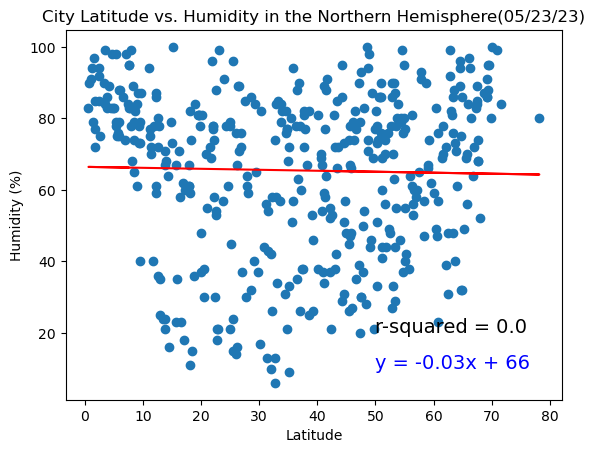

In [65]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
lin_reg_plot(x,y)
slope, inter, r, p, std_err = linregress(x, y)
r_squared = round(r**2,2)
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter))
plt.annotate(f"r-squared = {r_squared}", (50,20), fontsize=14, color="black")
plt.annotate(line,(50,10), fontsize=14, color="blue")
plt.title(f"City Latitude vs. Humidity in the Northern Hemisphere({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** Humidity and latitude don't appear to be correlated on the Northern hemisphere. The r-squared value is close to zero.

The r-value is: 0.0576830382514154


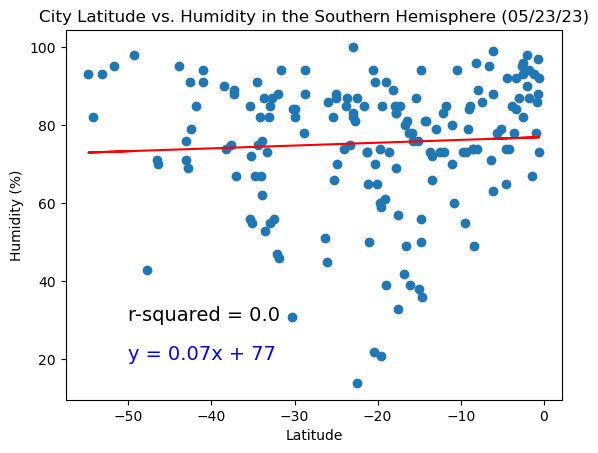

In [66]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
lin_reg_plot(x,y)
slope, inter, r, p, std_err = linregress(x, y)
r_squared = round(r**2,2)
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter))
plt.annotate(f"r-squared = {r_squared}", (-50,30), fontsize=14, color="black")
plt.annotate(line,(-50,20), fontsize=14, color="blue")
plt.title(f"City Latitude vs. Humidity in the Southern Hemisphere ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** Humdity and latitude appear to have a weak correlation. The r-value is close to zero. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.012990988954188406


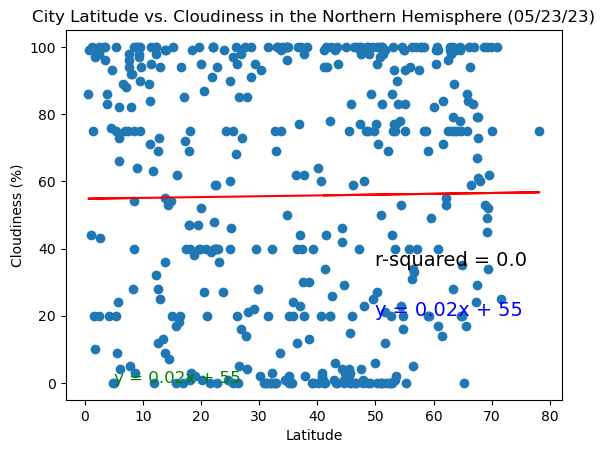

In [67]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

lin_reg_plot(x,y)
slope, inter, r, p, std_err = linregress(x, y)
r_squared = round(r**2,2)
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter))
plt.annotate(f"r-squared = {r_squared}", (50,35), fontsize=14, color="black")
plt.annotate(line,(50,20), fontsize=14, color="blue")
plt.title(f"City Latitude vs. Cloudiness in the Northern Hemisphere ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** Cloudiness and latitude appear to have a weak correlation. The r-value is close to zero in the Northern Hemisphere.

The r-value is: 0.06098858309385481


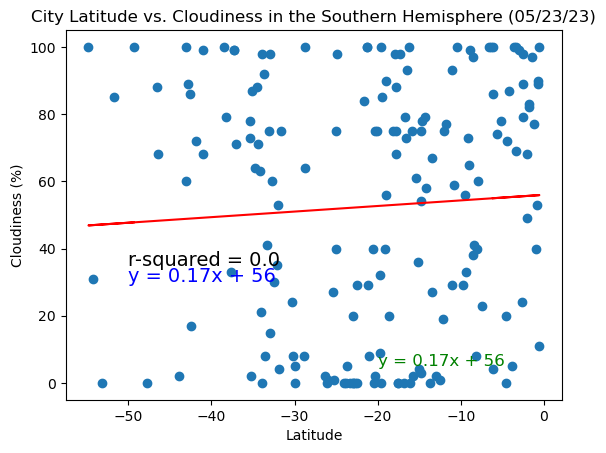

In [70]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
lin_reg_plot(x,y)
slope, inter, r, p, std_err = linregress(x, y)
r_squared = round(r**2,2)
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter))
plt.annotate(f"r-squared = {r_squared}", (-50,35), fontsize=14, color="black")
plt.annotate(line,(-50,30), fontsize=14, color="blue")
plt.title(f"City Latitude vs. Cloudiness in the Southern Hemisphere ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:**  The r-value sugguests a weak correlation between cloudiness and latitude in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1941773587873799


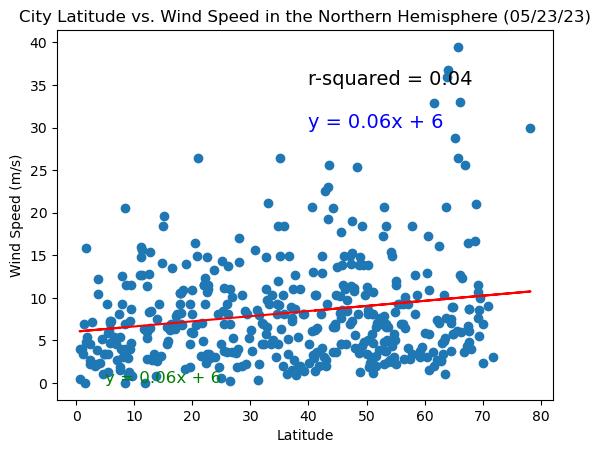

In [71]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
lin_reg_plot(x,y)
slope, inter, r, p, std_err = linregress(x, y)
r_squared = round(r**2,2)
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter))
plt.annotate(f"r-squared = {r_squared}", (40,35), fontsize=14, color="black")
plt.annotate(line,(40,30), fontsize=14, color="blue")
plt.title(f"City Latitude vs. Wind Speed in the Northern Hemisphere ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** Latitude and wind speed do not appear to be strongly correlated in the Northern Hemisphere. 

The r-value is: -0.20205607297222375


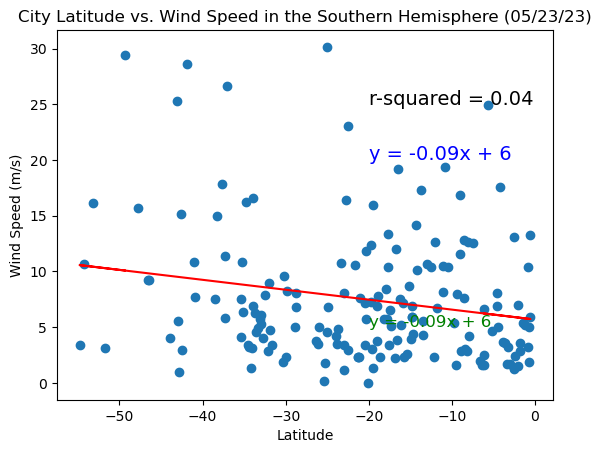

In [72]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
lin_reg_plot(x,y)
slope, inter, r, p, std_err = linregress(x, y)
r_squared = round(r**2,2)
line = "y = " + str(round(slope,2)) + "x + " + str(round(inter))
plt.annotate(f"r-squared = {r_squared}", (-20, 25), fontsize=14, color="black")
plt.annotate(line,(-20,20), fontsize=14, color="blue")
plt.title(f"City Latitude vs. Wind Speed in the Southern Hemisphere ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** Latitude and wind speed don't appear to be strongly correlated in the Southern Hemisphere. 